EL Modelo Autorregresivo Integrado de Media Móvil es una función de valores pasados de una serie de tiempo y ruido blanco. ARIMA es una generalización de los modelos de media móvil y de los procesos autorregresivos pero no tiene parámetros de integración, lo que ayuda a alimentar el modelo con los datos sin procesar. En este sentido, si se incluyen datos no estacionarios, ARIMA los hace estacionarios definiendo adecuadamente el parámetro de integración.

ARIMA tiene tres parámetros: $p,d,q$. En donde $p$ se refiere al orden de AR y $q$ al de MA; $d$ controla la diferencia de nivel. Si $d=1$ equivale a primera diferencia y si toma $0$ es ARMA.

Es posible tomar una $d$ mayor pero generalmente se toma una $d=1$. Entonces ARIMA$(p,1,q)$ se escribe como sigue: $$X_{t}=\alpha_{1}dX_{t-1}+\alpha_{2}dX_{t-2}+\dots+\alpha_{p}dX_{t-p}+\epsilon_{t}+\beta_{1}d\epsilon_{t-1}+\beta_{2}d\epsilon_{t-2}+\dots+\beta_{q}d\epsilon_{t-q}$$

Pros y contras de ARIMA:

Pros:
1. Permite trabajar con datos sin considerar estacionalidad.
2. Funciona bien con datos frecuentes.
3. Es menos sensible a la fluctuación en los datos comparado con otros modelos.

Contras:
1. Podría fallar en encontrar estacionalidad.
2. Funciona mejor con series a largo plazo.
3. No tener ajuste en ARIMA conduce a la inestabilidad.


In [4]:
import datetime
datos = ['AAPL', 'MSFT']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2023, 1, 1)
precio_salida = yf.download(datos, start=start, end = end, interval='1d').Close

[*********************100%***********************]  2 of 2 completed


In [5]:
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
split = int(len(precio_salida['AAPL'].values) * 0.85) #dividir en datos de entrenamiento y en datos de testing
train_aapl = precio_salida['AAPL'].iloc[:split]
test_aapl = precio_salida['AAPL'].iloc[split:]
train_msft = precio_salida['MSFT'].iloc[:split]
test_msft = precio_salida['MSFT'].iloc[split:]


In [6]:
#ARIMA con parámetros (p,d,q). d=1, ARIMA: d=0, ARMA

arima_apple = ARIMA(train_aapl,order=(15, 1, 12))
arima_ajustado_apple = arima_apple.fit()

C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-s

In [7]:
#ARIMA para Microsoft
arima_micro = ARIMA(train_msft, order=(22, 1, 7))
arima_ajustado_micro = arima_micro.fit()


C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [8]:
arima_predic_apple = arima_ajustado_apple.predict(start=len(train_aapl),
end=len(train_aapl) + len(test_aapl) - 1, dynamic=False)
arima_predic_micro= arima_ajustado_micro.predict(start=len(train_msft),
end=len(train_msft) + len(test_msft) - 1, dynamic=False)

C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
diff_test_apple=test_aapl.diff()
diff_test_micro=test_msft.diff()

In [10]:
#convertir a dataframe
import pandas as pd
arima_predic_apple = pd.DataFrame(arima_predic_apple)
arima_predic_apple.index = diff_test_apple.index
arima_predic_micro = pd.DataFrame(arima_predic_micro)
arima_predic_micro.index = diff_test_micro.index

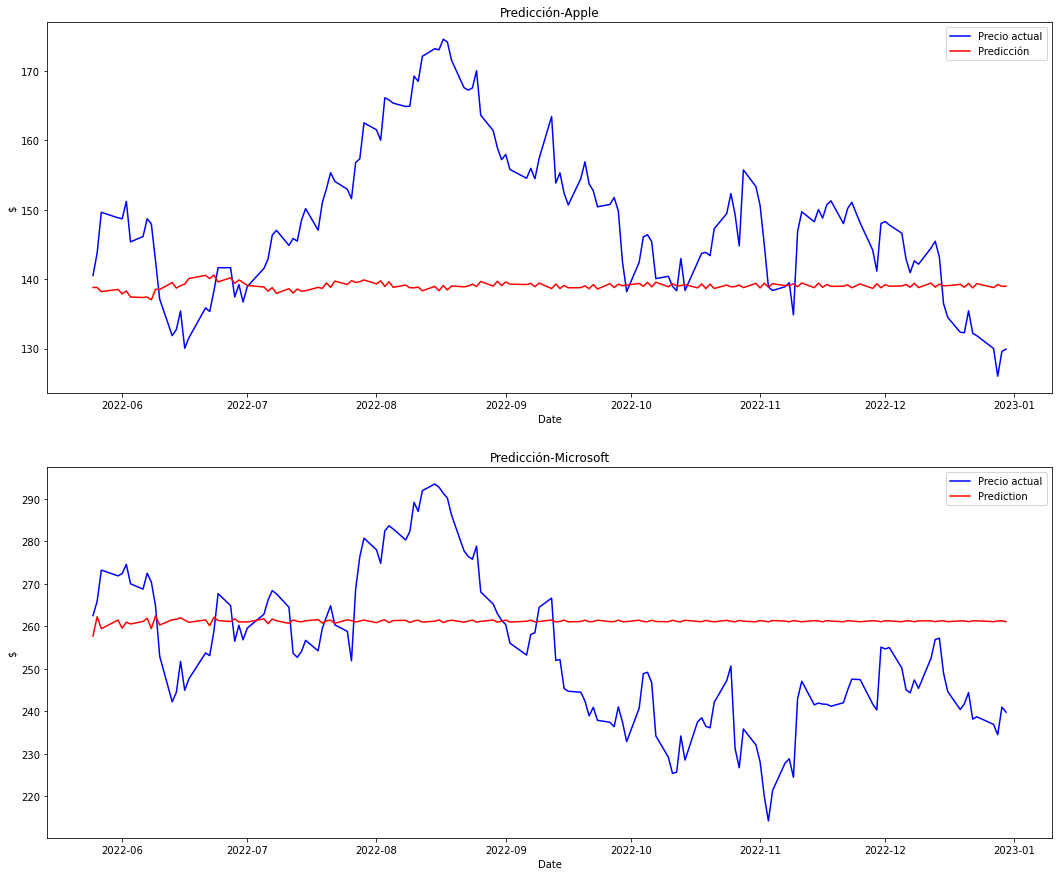

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(18, 15))
ax[0].plot(test_aapl, label='Precio actual', c='b')
ax[0].plot(arima_predic_apple, c='r', label="Predicción")
ax[0].set_title('Predicción-Apple')
ax[0].legend(loc='best')
ax[1].plot(test_msft, label='Precio actual', c='b')
ax[1].plot(arima_predic_micro, c='r', label="Prediction")
ax[1].set_title('Predicción-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='$')
plt.show()


Notar que la predicción tiende a la media. Se puede obtener un mejor pronóstico ajustando los parámetros.